In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fairness.pre_processing import categorical_to_numeric_converter
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset = pd.read_csv('./dataset/adult.data', sep=',')

In [3]:
dataset = categorical_to_numeric_converter(dataset)

In [4]:
dataset.rename(columns={" <=50K": "50K"}, inplace=True)

In [5]:
output_column = "50K"

In [6]:
X = dataset.iloc[:,:len(dataset.columns) - 2]
y = dataset.loc[:, output_column:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [9]:
estimator = DecisionTreeClassifier()

parameters =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [10]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='accuracy', 
    return_train_score=True, 
    verbose=1, cv=3
)

In [11]:
grid_search_classifier = grid_search.fit(X_train, y_train)

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\s

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\s

In [12]:
y_pred = grid_search_classifier.predict(X_test)

In [13]:
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score:  0.8343058968058968
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4912
           1       0.88      0.38      0.53      1600

    accuracy                           0.83      6512
   macro avg       0.85      0.68      0.71      6512
weighted avg       0.84      0.83      0.81      6512



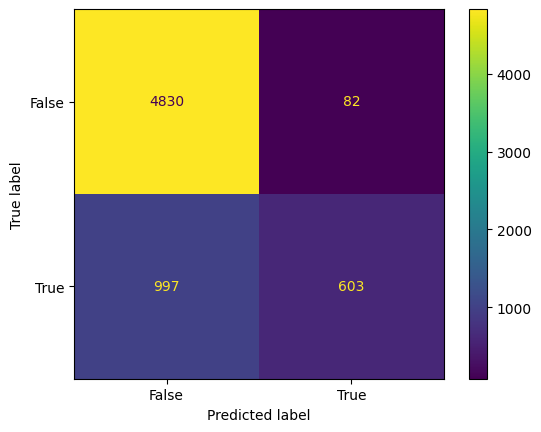

In [14]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
cm_display.plot()
plt.show()